In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import cufflinks as cf
import missingno as msno
from sklearn.feature_extraction.text import CountVectorizer

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('../data_test/X_testing.csv')
df

,Tweet
0,Indeks Pembangunan Manusia Indonesia 2017 Kemb...
1,Koster Ingin Kembalikan Kejayaan Klungkung seb...
2,RT USER: Bos Korea gua itu awalnya ga percaya ...
3,Seorang Ahok konsisten dengan memberangkatkan ...
4,Demi apapun deket kampus gue ditemuin tas yg d...
...,...
4625,"Ngomongnya gini ?nyatanya minta 2 periode.,; G..."
4626,USER selamat datang rezim Komunis Anti Islam
4627,Ruhut Sitompul: Prabowo Jangan Omdo URL
4628,BUBARKAN_DPR BUBARKAN_DPR BUBARKAN_DPR BUBARKA...


In [3]:
df.shape

(4630, 1)

In [4]:
df.isna().sum()

Tweet    0
dtype: int64

In [5]:
# Character Length

df['Char_Length'] = df.Tweet.apply(lambda x: len(str(x)))
df

,Tweet,Char_Length
0,Indeks Pembangunan Manusia Indonesia 2017 Kemb...,57
1,Koster Ingin Kembalikan Kejayaan Klungkung seb...,73
2,RT USER: Bos Korea gua itu awalnya ga percaya ...,144
3,Seorang Ahok konsisten dengan memberangkatkan ...,256
4,Demi apapun deket kampus gue ditemuin tas yg d...,70
...,...,...
4625,"Ngomongnya gini ?nyatanya minta 2 periode.,; G...",142
4626,USER selamat datang rezim Komunis Anti Islam,44
4627,Ruhut Sitompul: Prabowo Jangan Omdo URL,39
4628,BUBARKAN_DPR BUBARKAN_DPR BUBARKAN_DPR BUBARKA...,103


In [6]:
df.describe()

,Char_Length
count,4630.000000
mean,130.626350
std,72.929775
min,4.000000
25%,70.000000
50%,116.000000
75%,194.000000
max,341.000000


In [7]:
# min char length

data_min_char_length = df[df.Char_Length == 4]
data_min_char_length

,Tweet,Char_Length
352,Sama,4
2697,klik,4
3118,klik,4


In [10]:
# max char length

data_max_char_length = df[df.Char_Length == 341]
data_max_char_length

,Tweet,Char_Length
2217,USER \xe2\x80\xa2 My Idiot Brother (yaolo itu ...,341


In [13]:
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

df['Char_Length'].iplot(kind='hist',
                        bins=100,
                        xTitle='Character Length',
                        linecolor='black',
                        yTitle='Count',
                        title='Review Text Length Distribution')

In [14]:
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text)
    text = re.sub('rt',' ',text)
    text = re.sub('user',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub('  +', ' ', text)
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

def normalize_alay(text):
    alay_dict = pd.read_csv('../dataset/stopwords/kamusalay.csv', encoding='latin-1', header=None)
    alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})
    alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    id_stopword = pd.read_csv('../dataset/stopwords/idstopwords.csv', header=None)
    id_stopword = id_stopword.rename(columns={0: 'stopword'})
    text = ' '.join(['' if word in id_stopword.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)
    text = text.strip()
    return text

def preprocessing(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_alay(text)
    text = remove_stopword(text)
    return text

df["Preprocessing"] = df.Tweet.apply(preprocessing)
df.head()

,Tweet,Char_Length,Preprocessing
0,Indeks Pembangunan Manusia Indonesia 2017 Kemb...,57,indeks pembangunan manusia indonesia 2017 membaik
1,Koster Ingin Kembalikan Kejayaan Klungkung seb...,73,koster kembalikan kejayaan klungkung pusat sen...
2,RT USER: Bos Korea gua itu awalnya ga percaya ...,144,bos korea percaya begituan kejadian pabrik ora...
3,Seorang Ahok konsisten dengan memberangkatkan ...,256,ahok konsisten memberangkatkan saudara umat mu...
4,Demi apapun deket kampus gue ditemuin tas yg d...,70,apapun kampus ditemukan tas diduga isinya bom


In [15]:
df.to_csv('../data_test/X_testing_preprocessing.csv', index=None)

In [16]:
# df = pd.read_csv('../data_test/X_testing_preprocessing.csv')
# df

In [17]:
# Character Length After Preprocessing

df['Char_Length_Prep'] = df.Preprocessing.apply(lambda x: len(str(x)))
df

,Tweet,Char_Length,Preprocessing,Char_Length_Prep
0,Indeks Pembangunan Manusia Indonesia 2017 Kemb...,57,indeks pembangunan manusia indonesia 2017 membaik,49
1,Koster Ingin Kembalikan Kejayaan Klungkung seb...,73,koster kembalikan kejayaan klungkung pusat sen...,59
2,RT USER: Bos Korea gua itu awalnya ga percaya ...,144,bos korea percaya begituan kejadian pabrik ora...,68
3,Seorang Ahok konsisten dengan memberangkatkan ...,256,ahok konsisten memberangkatkan saudara umat mu...,153
4,Demi apapun deket kampus gue ditemuin tas yg d...,70,apapun kampus ditemukan tas diduga isinya bom,45
...,...,...,...,...
4625,"Ngomongnya gini ?nyatanya minta 2 periode.,; G...",142,mengomongnya 2 periode mengurus copras calon p...,102
4626,USER selamat datang rezim Komunis Anti Islam,44,selamat rezim komunis anti islam,32
4627,Ruhut Sitompul: Prabowo Jangan Omdo URL,39,ruhut sitompul prabowo omong doang,34
4628,BUBARKAN_DPR BUBARKAN_DPR BUBARKAN_DPR BUBARKA...,103,bubarkan dewan perwakilan rakyat bubarkan dewa...,263


In [18]:
df.describe()

,Char_Length,Char_Length_Prep
count,4630.000000,4630.000000
mean,130.626350,86.564579
std,72.929775,55.641024
min,4.000000,0.000000
25%,70.000000,44.000000
50%,116.000000,76.000000
75%,194.000000,122.000000
max,341.000000,381.000000


In [19]:
# min char length prep

data_min_char_length_prep = df[df.Char_Length_Prep == 0]
data_min_char_length_prep

,Tweet,Char_Length,Preprocessing,Char_Length_Prep
352,Sama,4,,0
370,USER USER USER USER USER USER USER USER USER U...,99,,0
582,USER USER USER USER USER USER USER USER USER U...,101,,0
614,USER USER USER USER USER USER USER USER USER U...,99,,0
643,RT USER: USER USER USER USER USER USER USER US...,71,,0
756,USER USER USER USER USER USER USER USER USER U...,99,,0
1035,RT USER: USER USER USER USER USER USER USER US...,66,,0
1232,USER USER USER USER USER USER USER USER USER U...,114,,0
1344,USER USER USER USER USER USER USER USER USER U...,109,,0
1347,USER Haruss,11,,0


In [20]:
index = data_min_char_length_prep.index
df.drop(labels=index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Tweet,Char_Length,Preprocessing,Char_Length_Prep
0,Indeks Pembangunan Manusia Indonesia 2017 Kemb...,57,indeks pembangunan manusia indonesia 2017 membaik,49
1,Koster Ingin Kembalikan Kejayaan Klungkung seb...,73,koster kembalikan kejayaan klungkung pusat sen...,59
2,RT USER: Bos Korea gua itu awalnya ga percaya ...,144,bos korea percaya begituan kejadian pabrik ora...,68
3,Seorang Ahok konsisten dengan memberangkatkan ...,256,ahok konsisten memberangkatkan saudara umat mu...,153
4,Demi apapun deket kampus gue ditemuin tas yg d...,70,apapun kampus ditemukan tas diduga isinya bom,45
...,...,...,...,...
4592,"Ngomongnya gini ?nyatanya minta 2 periode.,; G...",142,mengomongnya 2 periode mengurus copras calon p...,102
4593,USER selamat datang rezim Komunis Anti Islam,44,selamat rezim komunis anti islam,32
4594,Ruhut Sitompul: Prabowo Jangan Omdo URL,39,ruhut sitompul prabowo omong doang,34
4595,BUBARKAN_DPR BUBARKAN_DPR BUBARKAN_DPR BUBARKA...,103,bubarkan dewan perwakilan rakyat bubarkan dewa...,263


In [21]:
# max char length

data_max_char_length_prep = df[df.Char_Length_Prep == 381]
data_max_char_length_prep

,Tweet,Char_Length,Preprocessing,Char_Length_Prep
1119,Kasiter Beserta Muspida Tinjau Sasaran Fisik T...,254,kasiter bese a musyawarah pimpinan daerah tinj...,381


In [22]:
df.describe()

,Char_Length,Char_Length_Prep
count,4597.000000,4597.000000
mean,130.998477,87.185991
std,73.000303,55.353072
min,4.000000,1.000000
25%,70.000000,44.000000
50%,116.000000,77.000000
75%,194.000000,123.000000
max,341.000000,381.000000


In [26]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

df['Char_Length_Prep'].iplot(
    kind='hist',
    bins=100,
    xTitle='Char_Length_prep',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution After Preprocessing')

In [28]:
df = df.drop(['Tweet', 'Char_Length', 'Char_Length_Prep'], axis=1)
df = df.rename(columns={'Preprocessing':'Tweet'})
df

,Tweet
0,indeks pembangunan manusia indonesia 2017 membaik
1,koster kembalikan kejayaan klungkung pusat sen...
2,bos korea percaya begituan kejadian pabrik ora...
3,ahok konsisten memberangkatkan saudara umat mu...
4,apapun kampus ditemukan tas diduga isinya bom
...,...
4592,mengomongnya 2 periode mengurus copras calon p...
4593,selamat rezim komunis anti islam
4594,ruhut sitompul prabowo omong doang
4595,bubarkan dewan perwakilan rakyat bubarkan dewa...


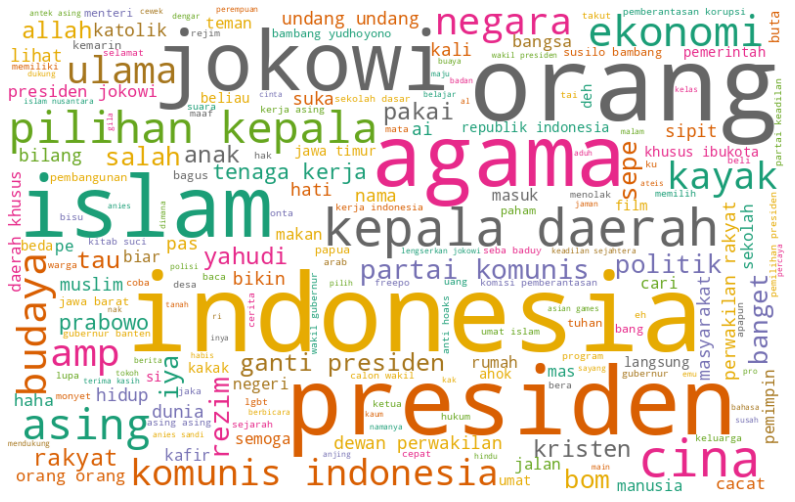

In [29]:
# wordcloud

tweet =' '.join([str(text) for text in df.Tweet])

wordcloud = WordCloud(width=800,
                      height=500,
                      background_color="white",
                      colormap="Dark2",
                      random_state=21,
                      max_font_size=110).generate(tweet)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
wordcloud.to_file("../data_test/wordcloud.png")

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_2_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_3_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
common_1_word = get_top_n_words(df['Tweet'], 10)
common_2_words = get_top_2_bigram(df['Tweet'], 10)
common_3_words = get_top_3_bigram(df['Tweet'], 10)

In [33]:
# pd.DataFrame(common_word).to_csv('../data_test/common_word.csv')

In [36]:
# The distribution of top unigrams before removing stop words

df1 = pd.DataFrame(common_1_word, columns = ['Tweet' , 'Count'])
df1

,Tweet,Count
0,indonesia,682
1,presiden,613
2,orang,564
3,jokowi,409
4,asing,392
5,agama,365
6,islam,354
7,daerah,328
8,gubernur,295
9,komunis,263


In [41]:
df1.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                      title='Top 10 Words in Review After Removing Stopwords')

In [42]:
# The distribution of top 2 grams before removing stop words

df3 = pd.DataFrame(common_3_words,
                   columns = ['Tweet' , 'Count'])

df3

,Tweet,Count
0,pilihan kepala daerah,188
1,partai komunis indonesia,128
2,2019 ganti presiden,81
3,dewan perwakilan rakyat,79
4,daerah khusus ibukota,50
5,susilo bambang yudhoyono,45
6,komisi pemberantasan korupsi,43
7,tenaga kerja indonesia,38
8,tenaga kerja asing,37
9,seba baduy 2018,34


In [45]:
df3.groupby('Tweet').sum()['Count'].sort_values(ascending=False).iplot(kind='bar',
                                                                       yTitle='Count',
                                                                       linecolor='black',
                                                                       title='Top 10 Trigrams in Review Before Removing Stopwords')

# Predictive Analysis

In [46]:
df

,Tweet
0,indeks pembangunan manusia indonesia 2017 membaik
1,koster kembalikan kejayaan klungkung pusat sen...
2,bos korea percaya begituan kejadian pabrik ora...
3,ahok konsisten memberangkatkan saudara umat mu...
4,apapun kampus ditemukan tas diduga isinya bom
...,...
4592,mengomongnya 2 periode mengurus copras calon p...
4593,selamat rezim komunis anti islam
4594,ruhut sitompul prabowo omong doang
4595,bubarkan dewan perwakilan rakyat bubarkan dewa...


In [47]:
import joblib

In [48]:
clf = joblib.load('../model/algo_model/model_logreg.jlib')

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [50]:
test_tfidf = tfidf.fit_transform(df.Tweet)

In [51]:
clf.predict(test_tfidf)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 1],
       [0, 0]])

In [52]:
df[['HS', 'Abusive']] = clf.predict(test_tfidf)
df[50:100]

,Tweet,HS,Abusive
50,barusan ulama sejawa barat dukung 2019,0,0
51,sedih lihat facebook membully iyalah ruf amin ...,0,1
52,tau tau ngechat sayang angin tsunami tau teman...,0,0
53,maaf orang udik,0,0
54,dilempar bom untung mati,0,0
55,langsung telan merek yahudi niatnya setia tela...,1,0
56,semiotika budaya populer kebudayaan barat este...,0,0
57,keren presidenku ayo tularkan internet positif...,0,0
58,ditanam binatang bangkai fitnah coba tanam,1,0
59,recommended along tengok cerita the danish gir...,1,1


In [56]:
df_predictive_analysis = df.iloc[0:20]
df_predictive_analysis.to_csv('../data_test/df_predictive_analysis.csv')

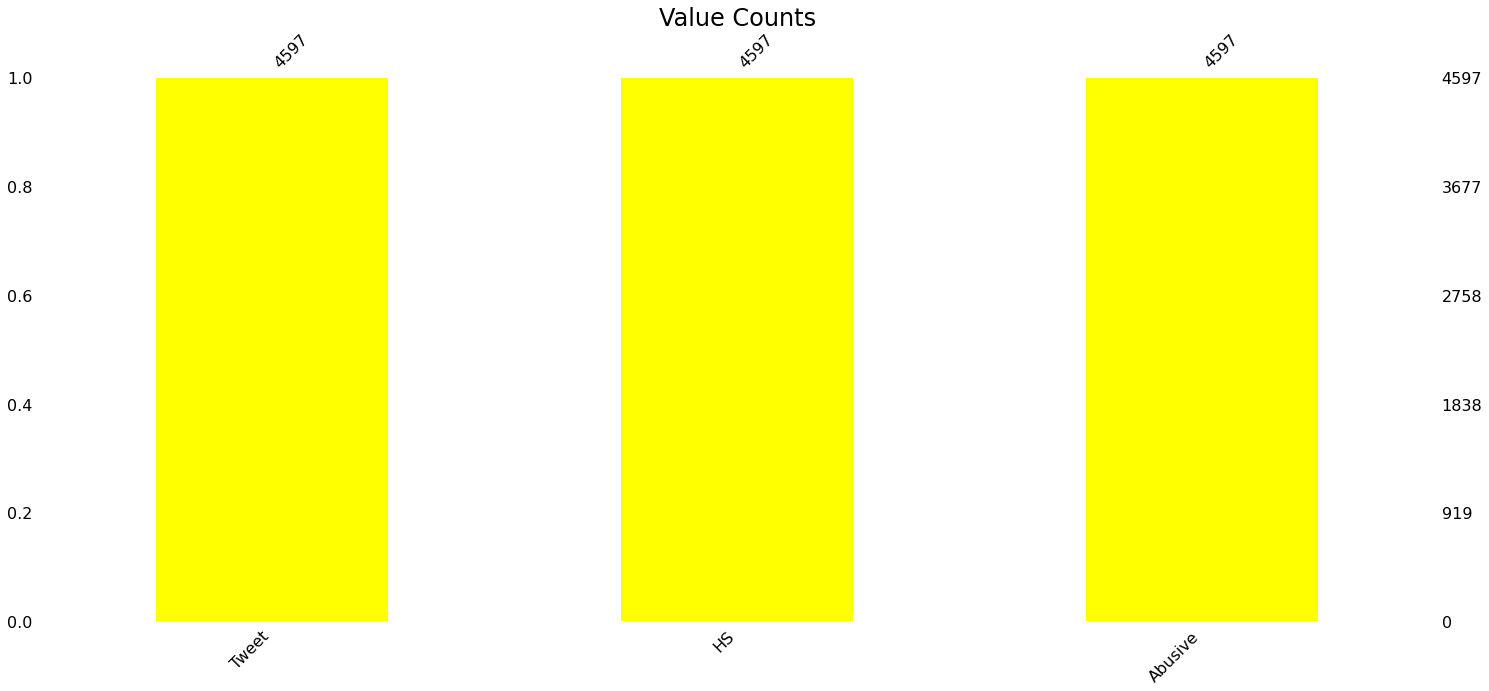

In [54]:
# Visualisasi Missing Values

msno.bar(df, color='yellow')
plt.title('Value Counts', fontsize=24)
plt.show()

In [58]:
# Amount of Data

neutral = df[(df['HS'] == 0) & (df['Abusive'] == 0)].shape
abusive = df[(df['HS'] == 0) & (df['Abusive'] == 1)].shape
hate_speech = df[(df['HS'] == 1) & (df['Abusive'] == 0)].shape
hate_and_abusive = df[(df['HS'] == 1) & (df['Abusive'] == 1)].shape

print(f"Neutral: {neutral}")
print(f"Abusive: {abusive}")
print(f"Hate Speech: {hate_speech}")
print(f"hate_and_abusive: {hate_and_abusive}")

Neutral: (3011, 3)
Abusive: (405, 3)
Hate Speech: (879, 3)
hate_and_abusive: (302, 3)


In [59]:
# Amount of Data visualization
colormap = plt.cm.plasma
temp = df.groupby(['HS', 'Abusive']).count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap=colormap)

,HS,Abusive,Tweet
0,0,0,3011
2,1,0,879
1,0,1,405
3,1,1,302


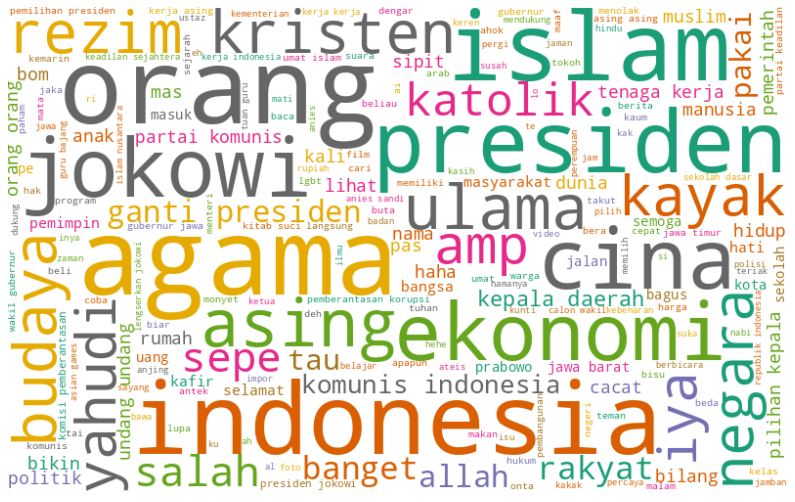

In [78]:
# wordcloud neutral

neutral_wordcloud =' '.join([str(text) for text in df['Tweet'][df['HS'] == 0][df['Abusive'] == 0]])
wordcloud_neutral = WordCloud(width=800,
                      height=500,
                      background_color="white",
                      colormap="Dark2",
                      random_state=21,
                      max_font_size=110).generate(neutral_wordcloud)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis('off')
plt.show()

In [79]:
wordcloud_neutral.to_file("../data_test/wordcloud_neutral.png")

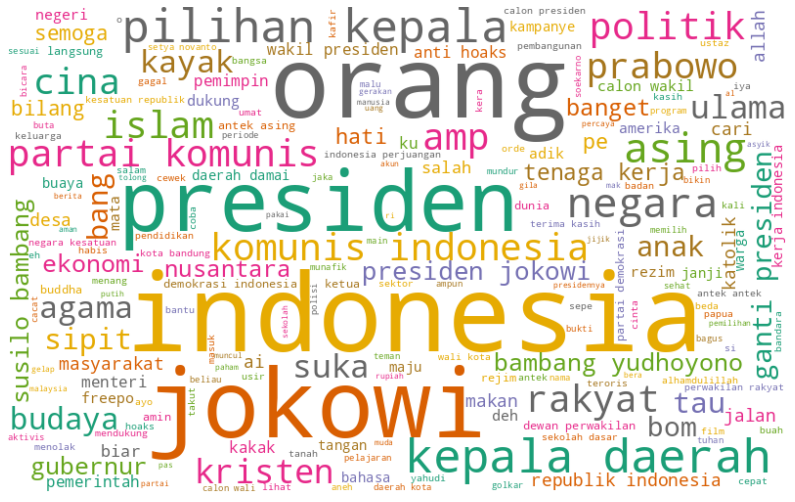

In [80]:
# wordcloud hatespeech

hatespeech_wordcloud =' '.join([str(text) for text in df['Tweet'][df['HS'] == 1][df['Abusive'] == 0]])
wordcloud_hatespeech = WordCloud(width=800,
                      height=500,
                      background_color="white",
                      colormap="Dark2",
                      random_state=21,
                      max_font_size=110).generate(hatespeech_wordcloud)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud_hatespeech, interpolation="bilinear")
plt.axis('off')
plt.show()

In [81]:
wordcloud_hatespeech.to_file("../data_test/wordcloud_hatespeech.png")

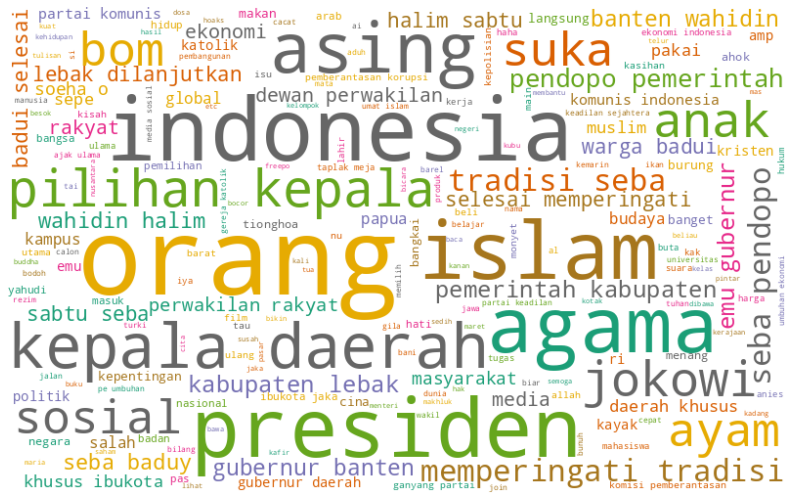

In [82]:
# wordcloud abusive

abusive_wordcloud =' '.join([str(text) for text in df['Tweet'][df['HS'] == 0][df['Abusive'] == 1]])
wordcloud_abusive = WordCloud(width=800,
                      height=500,
                      background_color="white",
                      colormap="Dark2",
                      random_state=21,
                      max_font_size=110).generate(abusive_wordcloud)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud_abusive, interpolation="bilinear")
plt.axis('off')
plt.show()

In [83]:
wordcloud_abusive.to_file("../data_test/wordcloud_abusive.png")

In [74]:
df_abusive = df[(df['HS'] == 0) & (df['Abusive'] == 1)]

In [75]:
df_abusive

,Tweet,HS,Abusive
4,apapun kampus ditemukan tas diduga isinya bom,0,1
7,ahok penjara mengutip kisah fiksi,0,1
20,hinaan dapatkan indonesia media media sosial b...,0,1
29,puasa beli nasi ayam berempah lupa cakap kuah ...,0,1
51,sedih lihat facebook membully iyalah ruf amin ...,0,1
...,...,...,...
4547,kepemimpinan jokowi organisasi masyarakat akur...,0,1
4550,prabowo orasi bantuan rohingya pencitraan isu ...,0,1
4561,gubernur ahok eksis bayi debora hem rasakan,0,1
4569,allahu akbar gaduh ahok rakyat front pembela i...,0,1


In [ ]:
from gensim.models import Word2Vec as w2v

In [ ]:
sentences = [df.Tweet.astype(str)]
sentences

In [ ]:
# build model sendiri

model_w2v = w2v(sentences=sentences, vector_size=128, window=7, min_count=5, sg=1)